# 📊 **Experiment Analysis (UR20, UR21, UR22, UR23)**

This notebook summarizes and analyzes the SQL baseline experiment results for  
**UR20**, **UR21**, **UR22**, and **UR23**.

---

## 🔍 **What was run**

We executed all combinations of:

- **14 split types**  
  *(the number indicates how many sources the base table was divided into)*  
  - `random_5`
  - `random_10`
  - `random_20`
  - `random_100`
  - `skewed_5`
  - `skewed_10`
  - `skewed_20`
  - `skewed_100`
  - `high_pen_5`
  - `high_pen_20`
  - `low_pen_5`
  - `low_pen_20`
  - `low_cov_5`
  - `low_cov_20`

- **θ thresholds:** `0.7`, `0.8`, `0.9`

- **2 methods:**
  - *Classic:* `method1_full_scan`
  - *Stats-guided:* `method1_full_scan_stats`

For every (UR, split, θ, method) combination, the system recorded:

- Runtime  
- Sources explored  
- Coverage  
- Penalty  
- Rows returned  
- Shipping time  
- Local processing time  

---

Load and clean the experiment summary

In [22]:
import pandas as pd
import random

# Load table
mathe = pd.read_csv("/Users/ahmaddfaress/Desktop/TVD/data/MATHE/output_table.csv",
                    sep=None, engine="python")

# --- Get sparse keyword_name values ---
keyword_counts = mathe["keyword_name"].value_counts()
rare_keywords = keyword_counts[keyword_counts <= 3].index.tolist()

# --- Get sparse duration values ---
duration_counts = mathe["duration"].value_counts()
rare_durations = duration_counts[duration_counts <= 3].index.tolist()

# --- Sample values for the UR ---
NUM_KEYWORDS = 4     # you can change
NUM_DURATIONS = 2    # you can change

selected_keywords = random.sample(rare_keywords, NUM_KEYWORDS)
selected_durations = random.sample(rare_durations, NUM_DURATIONS)

# --- Build UR ---
UR_deep = {
    "keyword_name": selected_keywords,
    "duration": selected_durations
}

print("Generated Deep UR:")
print(UR_deep)


Generated Deep UR:
{'keyword_name': ['Classification of geometrical figures', 'Volume', 'Third order', 'Open surface'], 'duration': [56.0, 47.0]}


In [23]:
keywords = ['Classification of geometrical figures', 'Volume', 'Third order', 'Open surface']
durations = [56.0, 47.0]

# Filter rows containing ANY of these keywords
rows_with_keywords = mathe[mathe["keyword_name"].isin(keywords)]

# Filter rows containing ANY of these durations
rows_with_durations = mathe[mathe["duration"].isin(durations)]

# Rows that have BOTH keyword and duration
rows_with_both = mathe[
    mathe["keyword_name"].isin(keywords) &
    mathe["duration"].isin(durations)
]

print("Rows with one of the keywords:", len(rows_with_keywords))
print("Rows with one of the durations:", len(rows_with_durations))
print("Rows where a keyword and duration appear together:", len(rows_with_both))

rows_with_both


Rows with one of the keywords: 7
Rows with one of the durations: 2
Rows where a keyword and duration appear together: 0


,id_assessment,student_id,question_id,id_topic,id_subtopic,question_level,answer_student,date_assessment,duration,option_selected,...,validate,validate_date,validate_by,newLevel,algorithmLevel,checked,keyword_id,keyword_name,topic_name,subtopic_name


In [3]:
import os
os.getcwd()


'/Users/ahmaddfaress/Desktop/TVD/Analysis'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/ahmaddfaress/Desktop/TVD/data/experiment_results/summary.csv")

numeric_cols = [
    "sources_explored", "shipping_time_total", "shipping_rows_total",
    "local_time_total", "method_time_total", "rows_final",
    "coverage_final", "penalty_final", "runtime_total"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

df.head()


,UR_id,dataset,split,n_sources,theta,method,sources_explored,shipping_time_total,shipping_rows_total,local_time_total,method_time_total,rows_final,coverage_final,penalty_final,runtime_total
0,20,MATHE,random_10,10,0.7,method1_full_scan,10,0.056237,20255,21.479059,21.535297,10,0.916667,0.565079,21.558967
1,20,MATHE,random_10,10,0.7,method1_full_scan_stats,1,0.006691,2026,0.423260,0.429951,10,0.916667,0.488889,0.445429
2,20,MATHE,random_10,10,0.8,method1_full_scan,10,0.054639,20255,21.321747,21.376386,10,0.916667,0.565079,21.388575
3,20,MATHE,random_10,10,0.8,method1_full_scan_stats,1,0.004832,2026,0.411692,0.416524,10,0.916667,0.488889,0.433005
4,20,MATHE,random_10,10,0.9,method1_full_scan,10,0.052601,20255,20.966385,21.018986,10,0.916667,0.565079,21.029174


Overview of Runs

In [9]:
print("URs:", df["UR_id"].unique())
print("Splits:", df["split"].unique())
print("Thetas:", df["theta"].unique())
print("Methods:", df["method"].unique())
print("Total runs:", len(df))


URs: [20 21 22 23]
Splits: ['random_10' 'random_100' 'random_20' 'random_5' 'skewed_10' 'skewed_100'
 'skewed_20' 'skewed_5' 'high_penalty_20' 'high_penalty_5'
 'low_coverage_20' 'low_coverage_5' 'low_penalty_20' 'low_penalty_5']
Thetas: [0.7 0.8 0.9]
Methods: ['method1_full_scan' 'method1_full_scan_stats']
Total runs: 337


Shipping cost vs local cost (coverage_guided and redndancy_pruning)

In [ ]:
avg_shipping = df["shipping_time_total"].mean()
avg_local = df["local_time_total"].mean()

overall = pd.DataFrame({
    "metric": ["average_shipping_time", "average_local_time"],
    "value": [avg_shipping, avg_local]
})

overall

,metric,value
0,average_shipping_time,0.045271
1,average_local_time,15.605745


Sources explored (Stat vs Non-Stat)

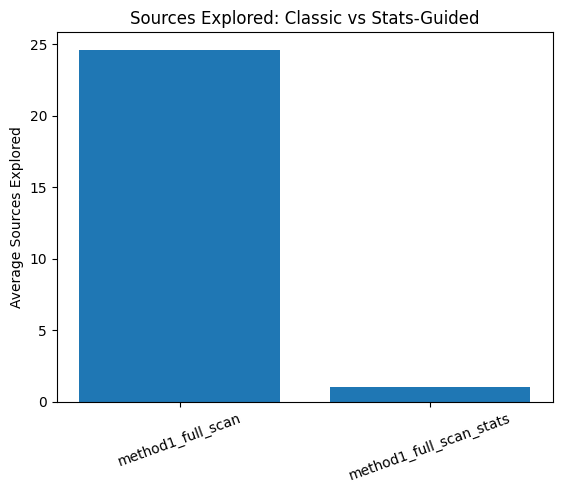

In [12]:
avg_sources = (
    df.groupby("method")["sources_explored"]
      .mean()
      .rename("avg_sources_explored")
)


methods = avg_sources.index
values = avg_sources.values

plt.bar(methods, values)
plt.ylabel("Average Sources Explored")
plt.title("Sources Explored: Classic vs Stats-Guided")
plt.xticks(rotation=20)
plt.show()


Shipping cost (Stat vs Non Stat) -- Since we explore less sources both the shipping cost and the local cost will be way less in stat version

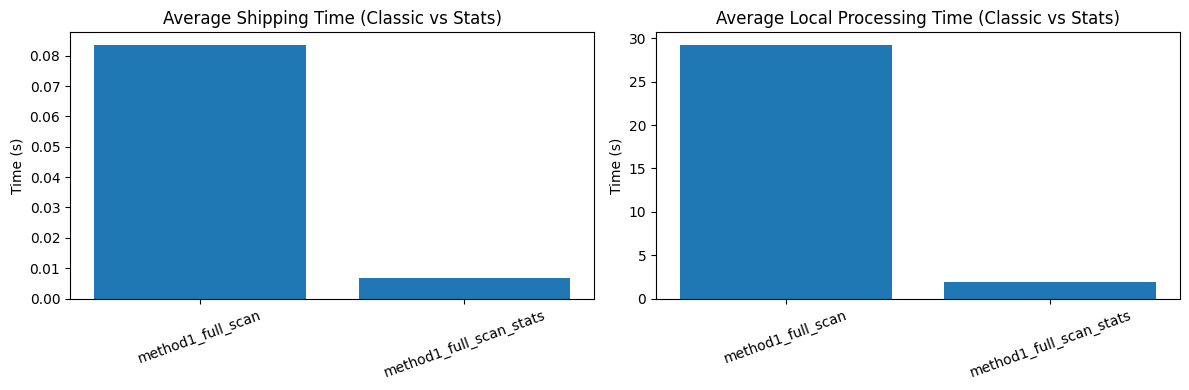

In [13]:
import matplotlib.pyplot as plt
avg_costs = (
    df.groupby("method")[["shipping_time_total", "local_time_total"]]
      .mean()
      .rename(columns={
          "shipping_time_total": "avg_shipping_time",
          "local_time_total": "avg_local_time"
      })
)


fig, ax = plt.subplots(1, 2, figsize=(12,4))

# --- Shipping time ---
ax[0].bar(avg_costs.index, avg_costs["avg_shipping_time"])
ax[0].set_title("Average Shipping Time (Classic vs Stats)")
ax[0].set_ylabel("Time (s)")
ax[0].tick_params(axis="x", rotation=20)

# --- Local time ---
ax[1].bar(avg_costs.index, avg_costs["avg_local_time"])
ax[1].set_title("Average Local Processing Time (Classic vs Stats)")
ax[1].set_ylabel("Time (s)")
ax[1].tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()


Now we check the quality of the results of the methods.

In [16]:
avg_quality = (
    df.groupby("method")[["coverage_final", "penalty_final"]]
      .mean()
      .rename(columns={
          "coverage_final": "avg_coverage",
          "penalty_final": "avg_penalty"
      })
)

avg_quality




,avg_coverage,avg_penalty
method,,
method1_full_scan,0.890110,0.486740
method1_full_scan_stats,0.887755,0.548649


And its graph in the code below

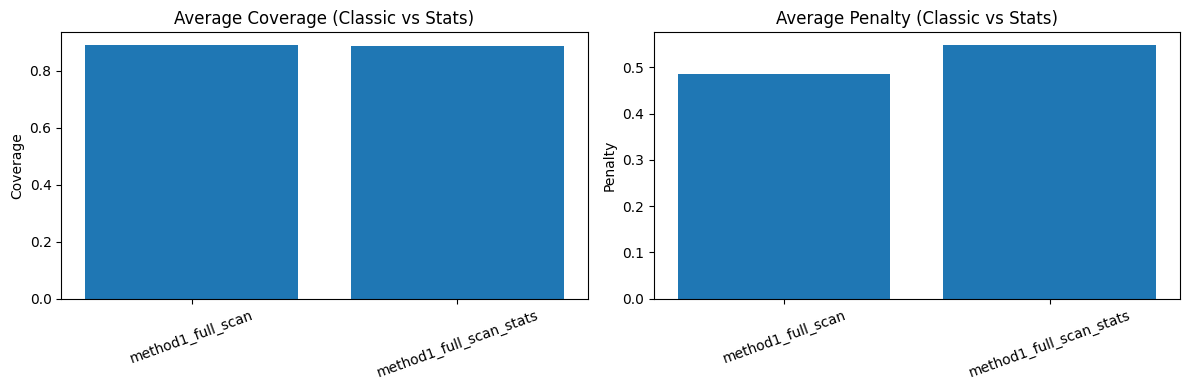

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# --- Coverage ---
ax[0].bar(avg_quality.index, avg_quality["avg_coverage"])
ax[0].set_title("Average Coverage (Classic vs Stats)")
ax[0].set_ylabel("Coverage")
ax[0].tick_params(axis="x", rotation=20)

# --- Penalty ---
ax[1].bar(avg_quality.index, avg_quality["avg_penalty"])
ax[1].set_title("Average Penalty (Classic vs Stats)")
ax[1].set_ylabel("Penalty")
ax[1].tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()

The Average coverage of both methods is nearly the same, while as visible exploring less sources gives the algorithm less chance to explore more rows that can potentially decrease the penalty. Thus we see the full scan yields a lower average penalty.

Now Deep UR (20-21) VS Shallow UR (22-23)

In [26]:
# Deep & shallow groupings
deep_urs = [20, 21]
shallow_urs = [22, 23]
sparse_urs = [30]

df_deep = df[df["UR_id"].isin(deep_urs)].copy()
df_shallow = df[df["UR_id"].isin(shallow_urs)].copy()
df_sparse = df[df["UR_id"].isin(sparse_urs)].copy()

print("Deep UR rows:", len(df_deep))
print("Shallow UR rows:", len(df_shallow))
print("Sparse UR rows:", len(df_sparse))


Deep UR rows: 168
Shallow UR rows: 169
Sparse UR rows: 84


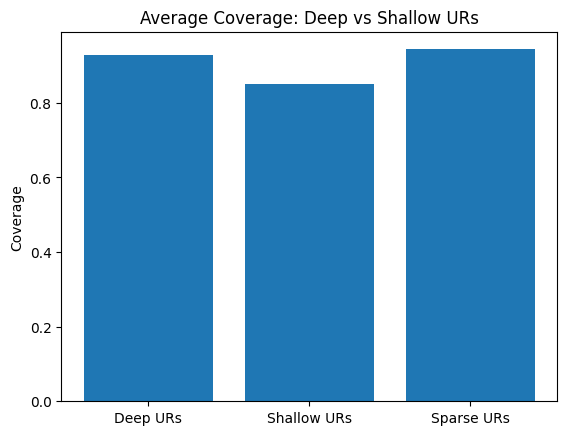

Deep coverage: 0.9285714285714286
Shallow coverage: 0.849535080304311
Sparse coverage: 0.9434523809523809


In [27]:
import matplotlib.pyplot as plt

avg_cov_deep = df_deep["coverage_final"].mean()
avg_cov_shallow = df_shallow["coverage_final"].mean()
avg_cov_sparse = df_sparse["coverage_final"].mean()

plt.bar(["Deep URs", "Shallow URs", "Sparse URs"], [avg_cov_deep, avg_cov_shallow, avg_cov_sparse])
plt.title("Average Coverage: Deep vs Shallow URs")
plt.ylabel("Coverage")
plt.show()

print("Deep coverage:", avg_cov_deep)
print("Shallow coverage:", avg_cov_shallow)
print("Sparse coverage:", avg_cov_sparse)


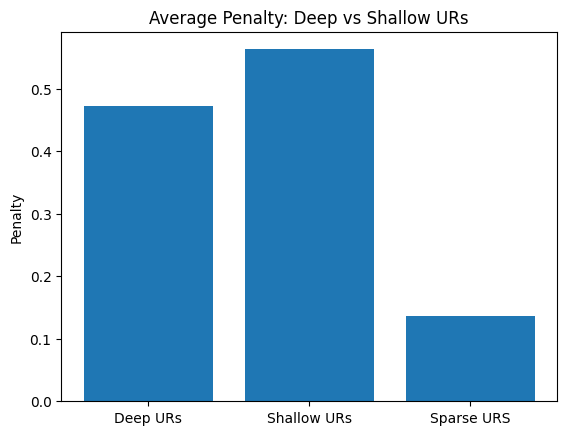

Deep penalty: 0.47207577475434614
Shallow penalty: 0.5628607656080182
Sparse penalty: 0.13690476190476186


In [28]:
avg_pen_deep = df_deep["penalty_final"].mean()
avg_pen_shallow = df_shallow["penalty_final"].mean()
avg_pen_sparse = df_sparse["penalty_final"].mean()

plt.bar(["Deep URs", "Shallow URs", "Sparse URS"], [avg_pen_deep, avg_pen_shallow, avg_pen_sparse])
plt.title("Average Penalty: Deep vs Shallow URs")
plt.ylabel("Penalty")
plt.show()

print("Deep penalty:", avg_pen_deep)
print("Shallow penalty:", avg_pen_shallow)
print("Sparse penalty:", avg_pen_sparse)


As expected, shallow URs have potential to yield more penalty, since it has more attributes.

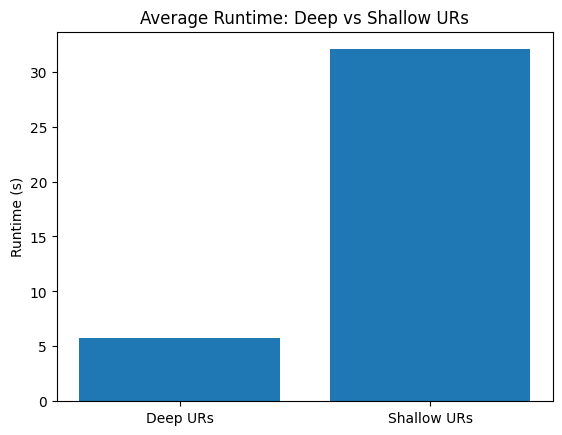

Deep runtime: 5.795018193267641
Shallow runtime: 32.03351168801799


In [ ]:
avg_rt_deep = df_deep["runtime_total"].mean()
avg_rt_shallow = df_shallow["runtime_total"].mean()
avg_rt_sparse = df_sparse["runtime_total"].mean()

plt.bar(["Deep URs", "Shallow URs", "Sparse URs"], [avg_rt_deep, avg_rt_shallow, avg_rt_sparse])
plt.title("Average Runtime: Deep vs Shallow URs")
plt.ylabel("Runtime (s)")
plt.show()

print("Deep runtime:", avg_rt_deep)
print("Shallow runtime:", avg_rt_shallow)
print("Sparse runtime:", avg_rt_sparse)


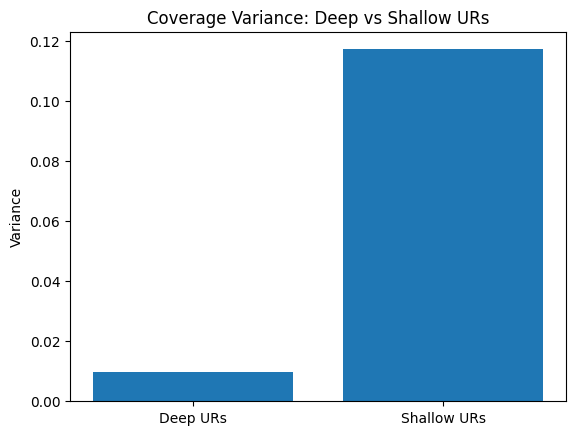

Deep coverage variance: 0.009837467921300257
Shallow coverage variance: 0.11728871599358255


In [24]:

var_deep = df_deep["coverage_final"].var()
var_shallow = df_shallow["coverage_final"].var()

plt.bar(["Deep URs", "Shallow URs"], [var_deep, var_shallow])
plt.title("Coverage Variance: Deep vs Shallow URs")
plt.ylabel("Variance")
plt.show()

print("Deep coverage variance:", var_deep)
print("Shallow coverage variance:", var_shallow)


Now some analysis on Split types:

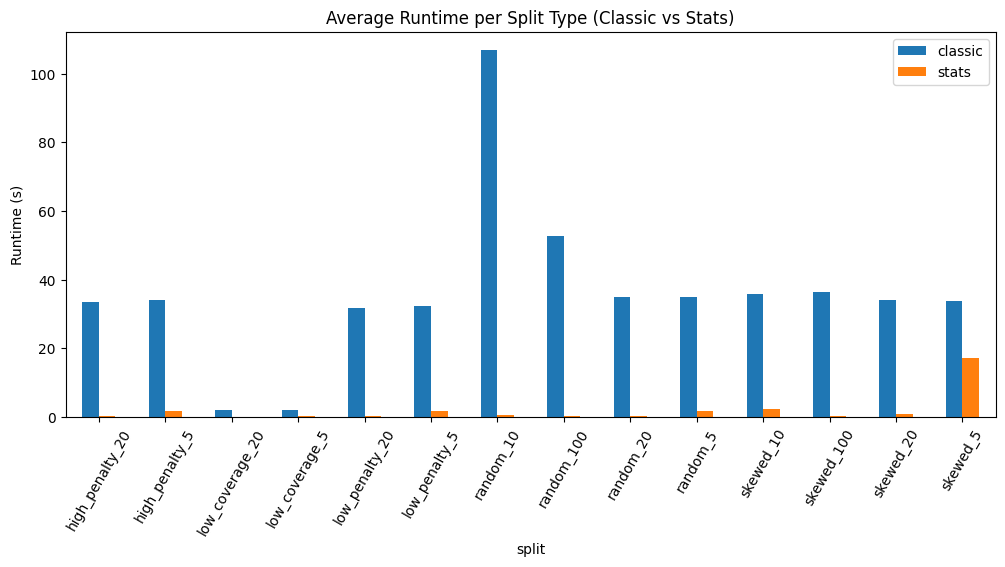

,classic,stats
split,,
high_penalty_20,33.590561,0.226264
high_penalty_5,34.201193,1.690292
low_coverage_20,1.961687,0.056979
low_coverage_5,2.117619,0.193497
low_penalty_20,31.809243,0.221056
low_penalty_5,32.187297,1.661463
random_10,106.908190,0.540983
random_100,52.597513,0.146196
random_20,34.831053,0.227895


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

classic = df[df["method"] == "method1_full_scan"]
stats = df[df["method"] == "method1_full_scan_stats"]

runtime_by_split = pd.DataFrame({
    "classic": classic.groupby("split")["runtime_total"].mean(),
    "stats": stats.groupby("split")["runtime_total"].mean(),
})

runtime_by_split.plot(kind="bar", figsize=(12,5))
plt.title("Average Runtime per Split Type (Classic vs Stats)")
plt.ylabel("Runtime (s)")
plt.xticks(rotation=60)
plt.show()

runtime_by_split


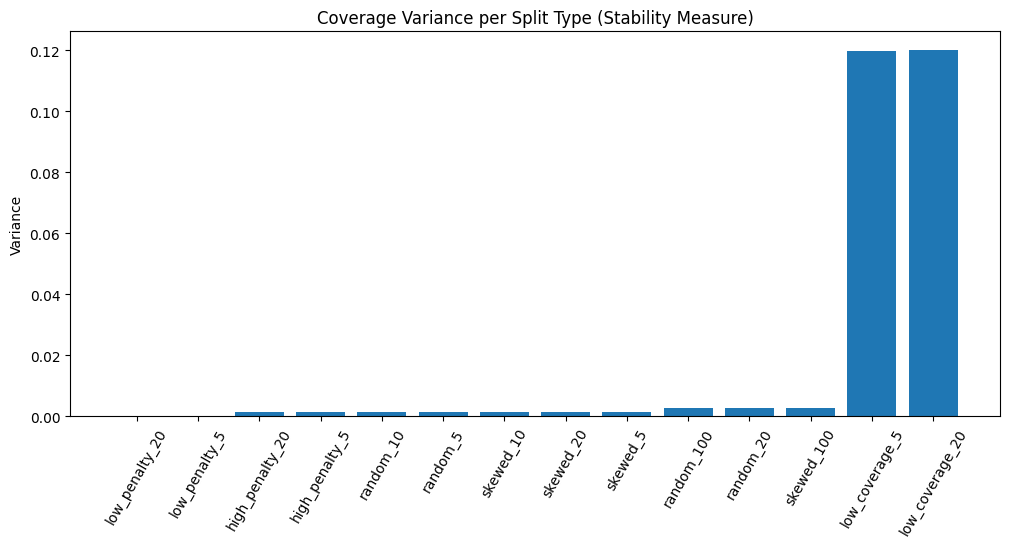

split
low_penalty_20     0.000000
low_penalty_5      0.000000
high_penalty_20    0.001359
high_penalty_5     0.001359
random_10          0.001359
random_5           0.001359
skewed_10          0.001359
skewed_20          0.001359
skewed_5           0.001359
random_100         0.002911
random_20          0.002911
skewed_100         0.002911
low_coverage_5     0.119593
low_coverage_20    0.120146
Name: coverage_final, dtype: float64

In [ ]:
coverage_variance = df.groupby("split")["coverage_final"].var().sort_values()

plt.figure(figsize=(12,5))
plt.bar(coverage_variance.index, coverage_variance.values)
plt.title("Coverage Variance per Split Type")
plt.ylabel("Variance")
plt.xticks(rotation=60)
plt.show()

coverage_variance


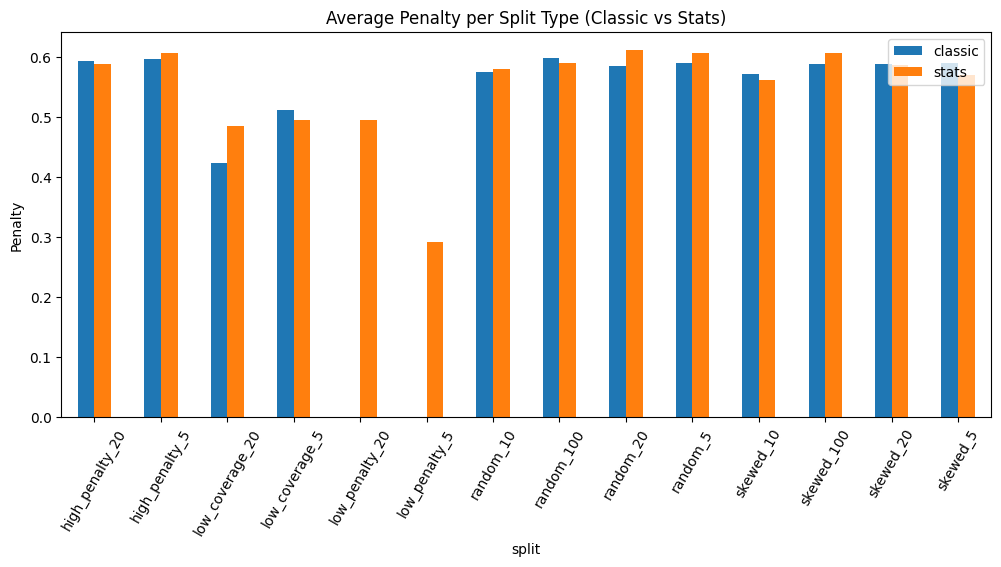

,classic,stats
split,,
high_penalty_20,0.594114,0.589153
high_penalty_5,0.597090,0.607039
low_coverage_20,0.424451,0.484821
low_coverage_5,0.511905,0.495238
low_penalty_20,0.000000,0.496060
low_penalty_5,0.000000,0.291071
random_10,0.575463,0.580055
random_100,0.598280,0.590146
random_20,0.586177,0.611971


In [5]:
penalty_by_split = pd.DataFrame({
    "classic": classic.groupby("split")["penalty_final"].mean(),
    "stats": stats.groupby("split")["penalty_final"].mean(),
})

penalty_by_split.plot(kind="bar", figsize=(12,5))
plt.title("Average Penalty per Split Type (Classic vs Stats)")
plt.ylabel("Penalty")
plt.xticks(rotation=60)
plt.show()

penalty_by_split


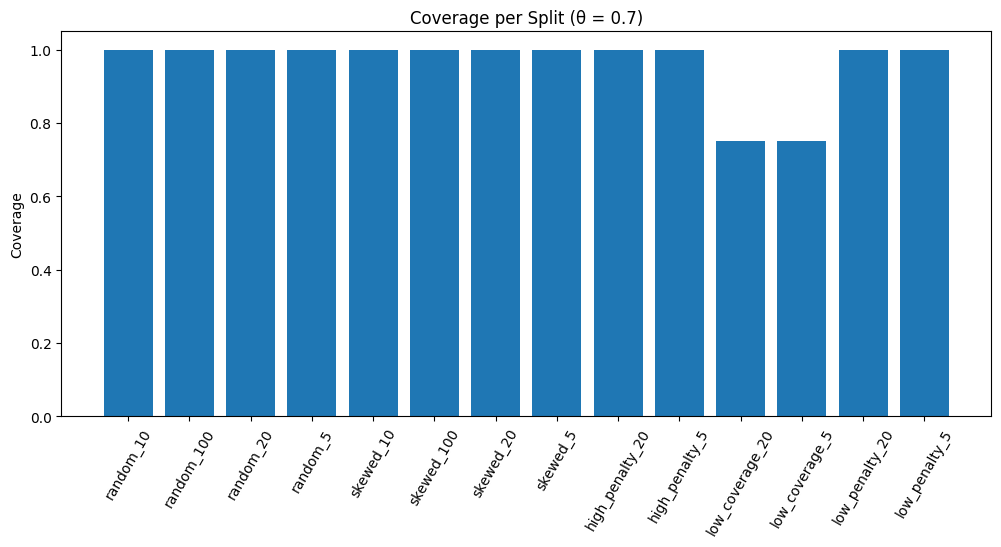

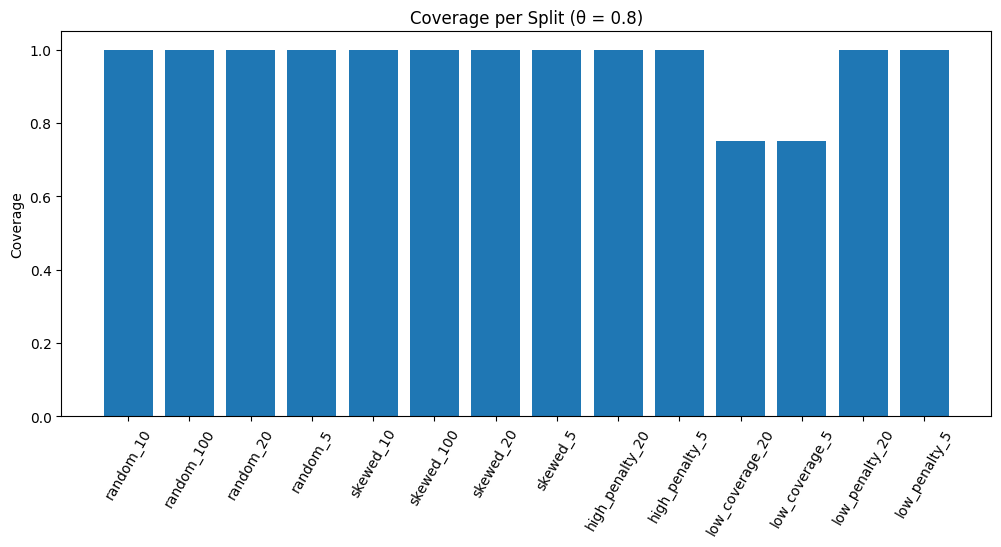

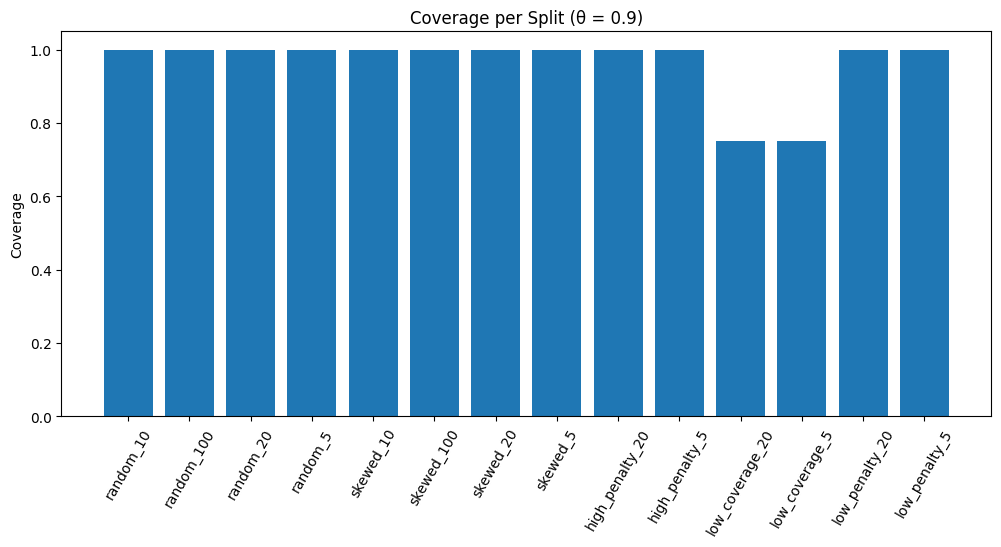

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

for theta in sorted(df["theta"].unique()):
    sub = df[df["theta"] == theta]

    plt.figure(figsize=(12,5))
    plt.bar(sub["split"], sub["coverage_final"])
    plt.xticks(rotation=60)
    plt.title(f"Coverage per Split (θ = {theta})")
    plt.ylabel("Coverage")
    plt.show()


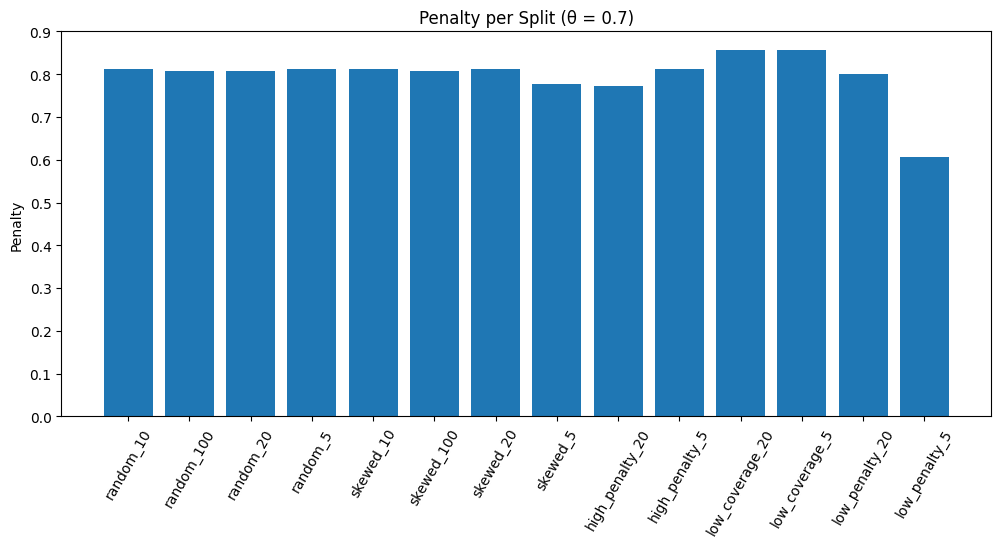

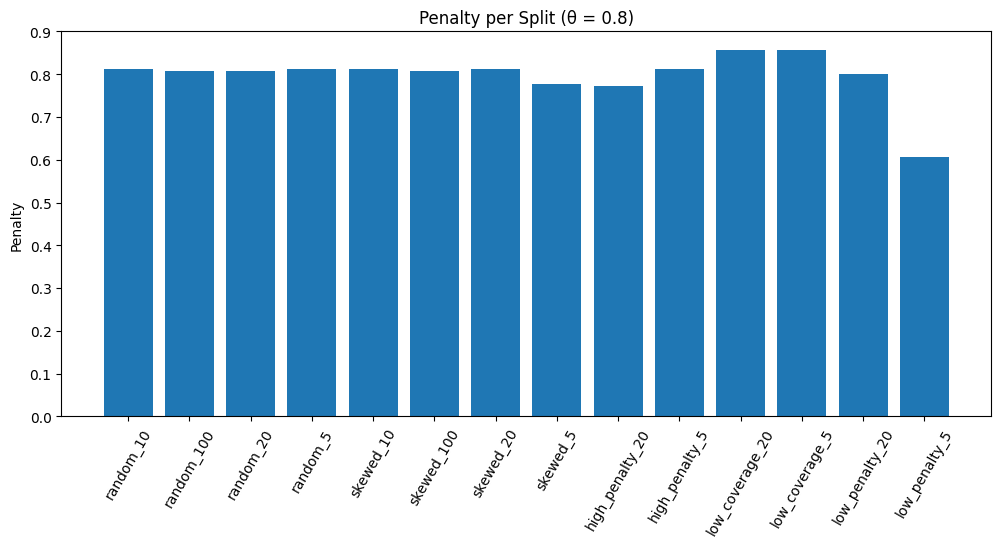

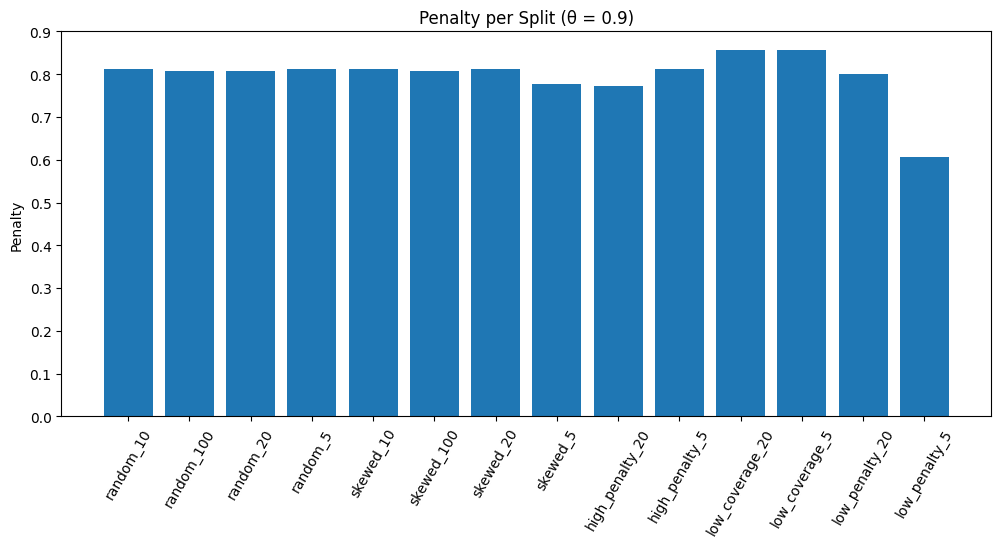

In [9]:
for theta in sorted(df["theta"].unique()):
    sub = df[df["theta"] == theta]

    plt.figure(figsize=(12,5))
    plt.bar(sub["split"], sub["penalty_final"])
    plt.xticks(rotation=60)
    plt.title(f"Penalty per Split (θ = {theta})")
    plt.ylabel("Penalty")
    plt.show()


Theta does not show much difference as it varies, since we are exploring everything. I will try to see it with only stat version.

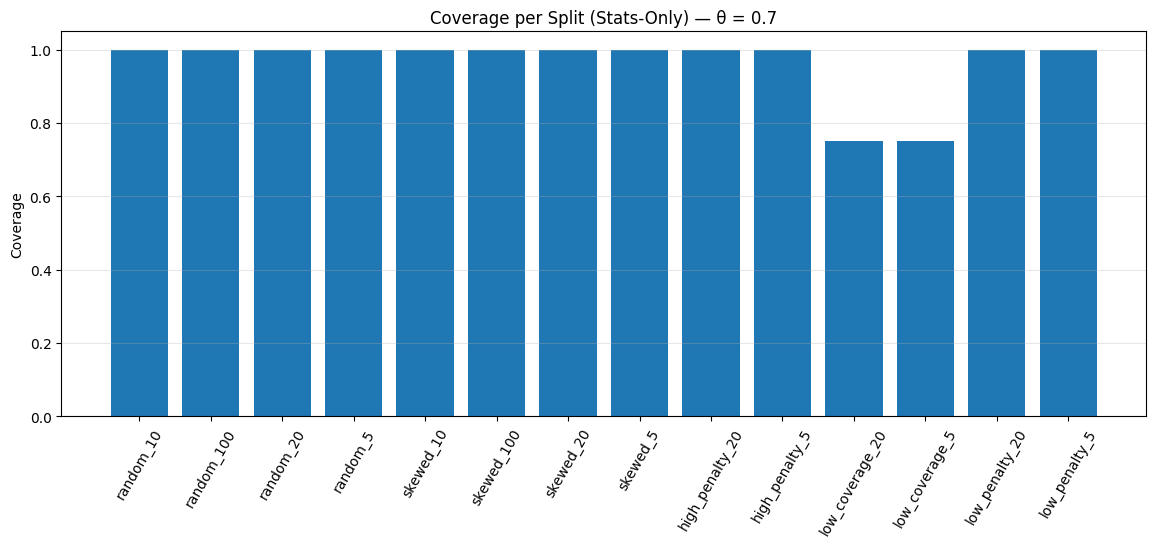

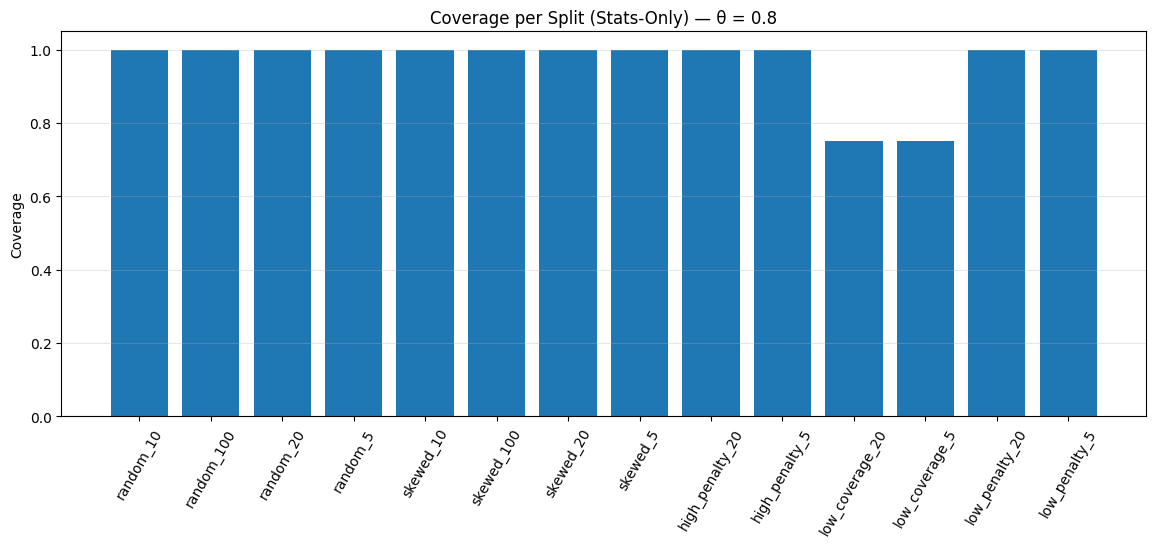

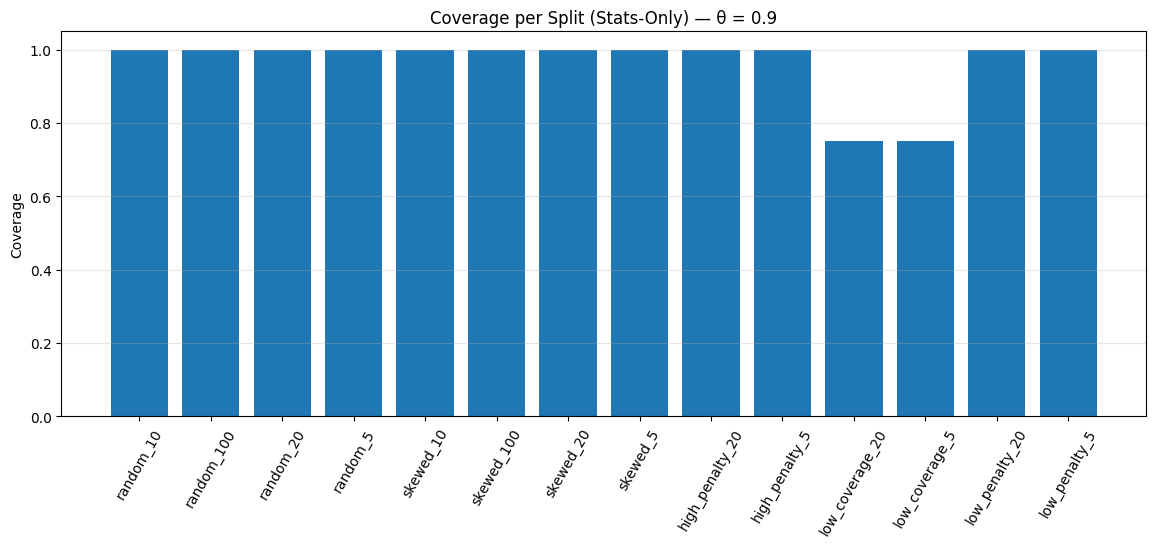

In [11]:
import matplotlib.pyplot as plt

# keep only stat-guided
df_stat = df[df["method"] == "method1_full_scan_stats"]

for theta in sorted(df_stat["theta"].unique()):
    sub = df_stat[df_stat["theta"] == theta]

    plt.figure(figsize=(14,5))
    plt.bar(sub["split"], sub["coverage_final"])
    plt.xticks(rotation=60)
    plt.title(f"Coverage per Split (Stats-Only) — θ = {theta}")
    plt.ylabel("Coverage")
    plt.ylim(0, 1.05)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


Also not much difference, but it is dataset and UR dependent...

/var/folders/bh/kw03ywlx2g9593c9fsnk3vw40000gn/T/ipykernel_50755/179904910.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


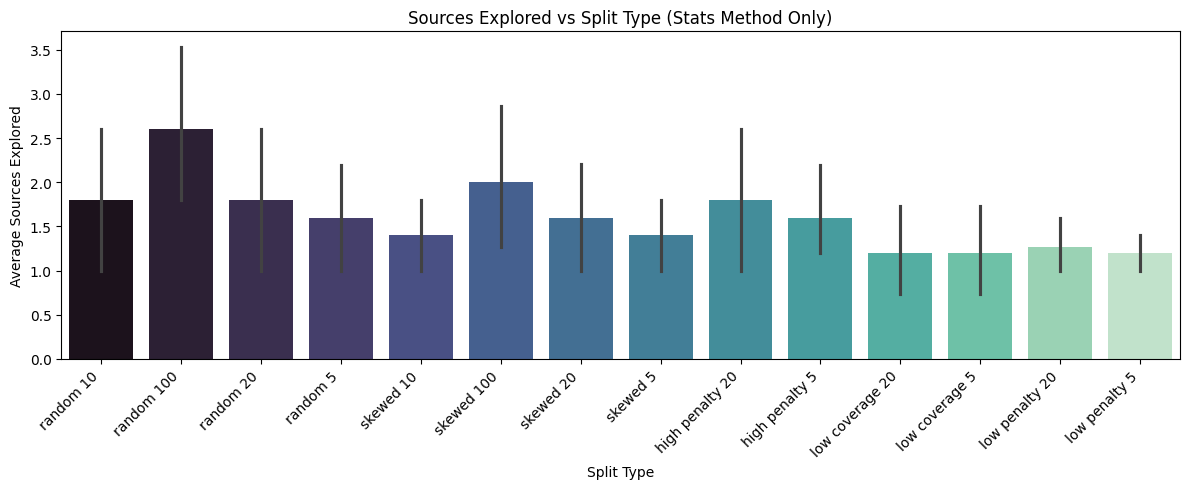

In [25]:
import matplotlib.pyplot as plt

# --- Keep only stats method ---
df_stats = df[df["method"] == "method1_full_scan_stats"].copy()

# Convert numeric
df_stats["sources_explored"] = pd.to_numeric(df_stats["sources_explored"], errors="coerce")

# Clean split names for readability
df_stats["split_clean"] = df_stats["split"].str.replace("_", " ")

plt.figure(figsize=(12, 5))

sns.barplot(
    data=df_stats,
    x="split_clean",
    y="sources_explored",
    estimator="mean",
    palette="mako"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Sources Explored")
plt.xlabel("Split Type")
plt.title("Sources Explored vs Split Type (Stats Method Only)")
plt.tight_layout()
plt.show()
